In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [4]:
#Cargamos el dataframe limpio
df = pd.read_csv("datos/SpotifyYtlimpio.csv", index_col="Unnamed: 0")
pd.options.display.max_columns = None

In [5]:
df_album = df[df["album_type"] == "album"]
df_single = df[df["album_type"]== "single"]
df_compilation = df[df["album_type"] == "compilation"]

In [8]:
"""Definimos una función que nos devuelva la media y la desviación estadística de los atributos danceability,
acousticness y speechnees"""
def atributoscancion(df):
    media_dc = df["danceability"].mean()
    std_dc = df["danceability"].std()
    media_ac = df["acousticness"].mean()
    std_ac = df["acousticness"].std()
    media_sp = df["speechiness"].mean()
    std_sp = df["speechiness"].std()
    data = {'media':[media_dc,media_ac,media_sp], 'std': [std_dc,std_ac,std_sp]}
    df_data = pd.DataFrame.from_dict(data, orient='index', 
                                 columns=['danceability', 'acousticness', 'speechiness']).round(2)
    print(df_data)

In [10]:
atributoscancion(df_compilation)

       danceability  acousticness  speechiness
media          0.57          0.34         0.08
std            0.18          0.31         0.08


In [14]:
atributoscancion(df_album)

       danceability  acousticness  speechiness
media          0.61          0.29         0.09
std            0.17          0.29         0.11


In [15]:
atributoscancion(df_single)

       danceability  acousticness  speechiness
media          0.67          0.26          0.1
std            0.15          0.26          0.1


In [11]:
"""Esta función devuelve un subplot con dos gráficas ordenando los artistas en un top diez en función de 
las visitas y los likes."""
def toplikesviews(df,group):
    df_views = df.groupby(group)["views"].mean().round(2).reset_index()
    df_likes = df.groupby(group)["likes"].mean().round(2).reset_index()
    df_views.sort_values(by='views', ascending= False,inplace=True)
    views_top =df_views.head(10)
    df_likes.sort_values(by="likes", ascending= False, inplace=True)
    likes_top = df_likes.head(10)
    fig,ax = plt.subplots(2,1, figsize = (15,10))
    sns.barplot(x="artist",y= "views", data= views_top, palette= "crest", ax = ax[0])
    for indice, valor in enumerate(views_top["views"]):
        ax[0].text(indice,valor, str(valor), horizontalalignment = "center", fontsize = 8);
    sns.barplot(x="artist", y="likes",data=likes_top, palette ="viridis", ax = ax[1])
    for indice, valor in enumerate(likes_top["likes"]):
        ax[1].text(indice,valor, str(valor), horizontalalignment = "center", fontsize = 8);
    ax[0].set_title("Top 10 visualizaciones")
    ax[1].set_title("Top 10 likes")
    plt.show()

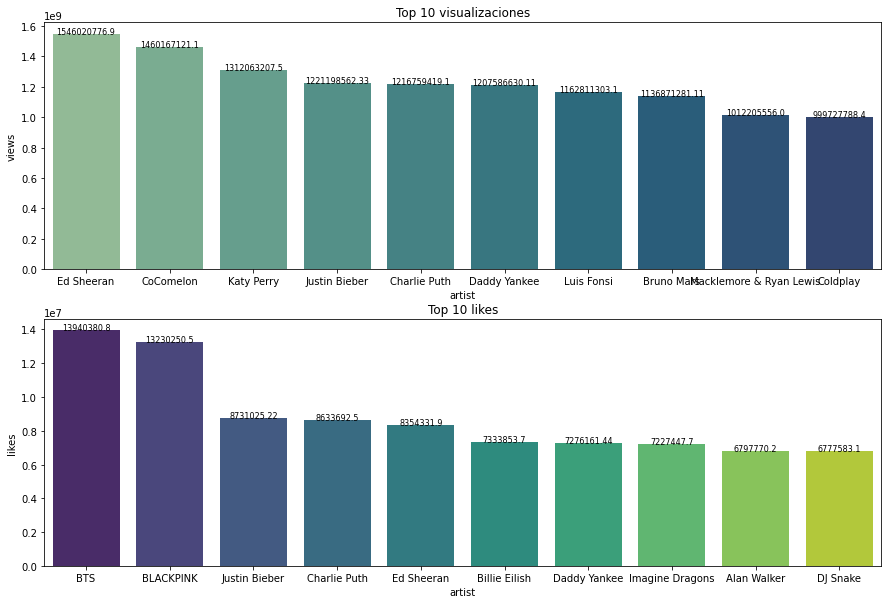

In [12]:
toplikesviews(df,"artist")

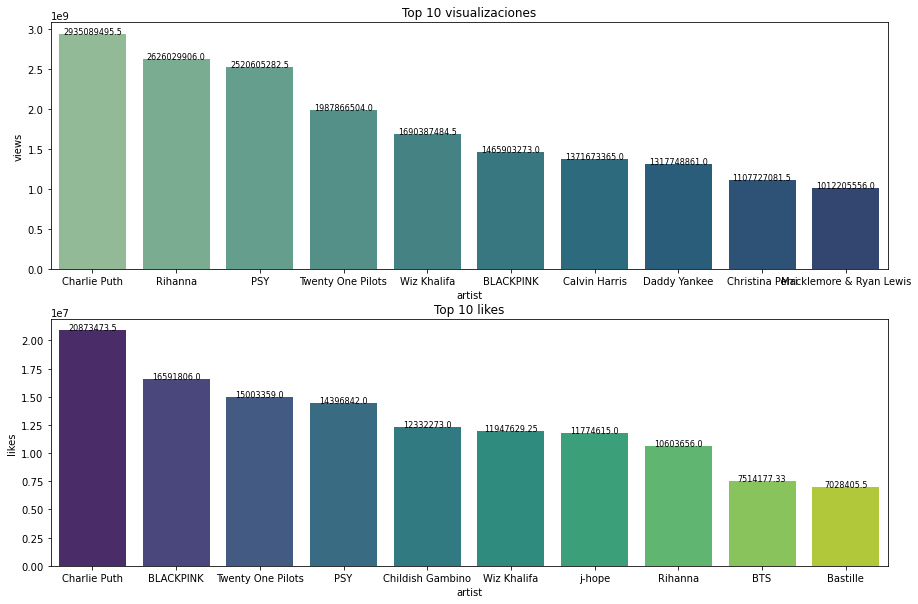

In [13]:
toplikesviews(df_single,"artist")

In [21]:
"""Esta función realiza un filtrado a partir de regex en una columna a nuestra elección para después realizar 
un groupby y devolvernos los diez valores más importantes en función de ese filtrado"""
def filtrado(df,columna, grupo,patron):
    colaboraciones = df[df[columna].str.contains(patron, regex= True)]
    print("Los artistas han hecho esta cantidad de colaboraciones",colaboraciones.groupby("artist")[columna].count().reset_index())
    artist_colab = colaboraciones.groupby(grupo)[columna].count().reset_index()
    artist_colab.sort_values(by=columna, ascending = False,inplace=True)
    ten_colab = artist_colab.head(10)
    plt.figure(figsize= (15,5))
    sns.barplot(x=grupo, y= columna, data=ten_colab, palette = 'mako')
    plt.title("Top 10 artistas que han hecho colaboraciones")
    plt.ylabel("colaboraciones")
    for indice, valor in enumerate(ten_colab[columna]):
        plt.text(indice, valor + 0.10, str(valor),
        horizontalalignment  = "center", fontsize = 8);
    plt.show()

In [22]:
patron = "feat"
columna = "track"
grupo = "artist"

Los artistas han hecho esta cantidad de colaboraciones                 artist  track
0            070 Shake      1
1                  112      4
2               1nonly      1
3             2 Chainz      1
4            21 Savage      2
..                 ...    ...
673              keshi      1
674  sped up nightcore      1
675             thasup      8
676               Ñejo      1
677         Ñengo Flow      1

[678 rows x 2 columns]


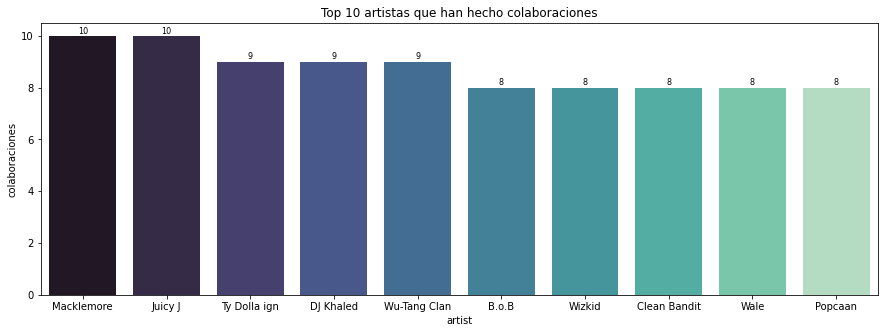

In [24]:
filtrado(df, columna, grupo, patron)

In [12]:
"""Esta función nos recoge el número de visitas por cada tipo de álbum y nos lo representa en un boxplot, 
después realiza un análisis del porcentaje de outliers por encima del IQR para observar los picos de popularidad
en función de los diferentes formatos"""
def visitasportipo():
    plt.figure(figsize=(15,10))
    fig = sns.boxplot(x="album_type", y = "views", data=df)
    fig.set(xlabel = "Album type", ylabel = "views")
    fig.set_title("Relación entre el tipo de album y las visitas")
    fig.set_ylim(0,2e8)
    plt.show()
    df_album["popularidad"] = np.where(df_album["views"]> 1.85e8, "alta","normal")
    df_single["popularidad"] = np.where(df_single["views"]> 1.60e8, "alta","normal")
    df_compilation["popularidad"] = np.where(df_compilation["views"]> 1.70e8, "alta","normal")
    popa = df_album['popularidad'].value_counts().reset_index()
    pops = df_single['popularidad'].value_counts().reset_index()
    popc = df_compilation['popularidad'].value_counts().reset_index()
    
    explode = (0.1,0.1)
    plt.figure(facecolor="white", figsize = (10,5))
    plt.pie(popa['popularidad'], labels= popa["index"], autopct='%1.1f%%', colors = ['purple','indigo'], explode = explode)
    plt.title("Relación entre el IQR de visitas y los outliers para albums")
    plt.show();
    
    plt.figure(facecolor="white", figsize = (10,5))
    plt.pie(pops['popularidad'],labels= pops["index"], autopct='%1.1f%%', colors = ['yellow','coral'], explode = explode)
    plt.title("Relación entre el IQR de visitas y los outliers para single")
    plt.show();
    
    plt.figure(facecolor="white", figsize = (10,5))
    plt.pie(popc['popularidad'], labels= popc["index"], autopct='%1.1f%%', colors = ['blueviolet','mediumslateblue'], explode = explode)
    plt.title("Relación entre el IQR de visitas y los outliers para compilación")
    plt.show();

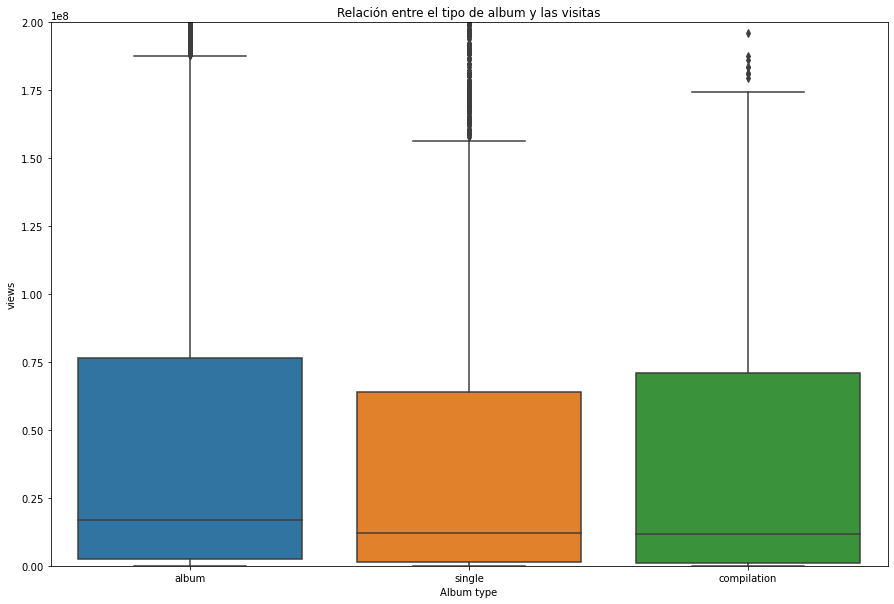

/tmp/ipykernel_17427/2322907090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_album["popularidad"] = np.where(df_album["views"]> 1.85e8, "alta","normal")
/tmp/ipykernel_17427/2322907090.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single["popularidad"] = np.where(df_single["views"]> 1.60e8, "alta","normal")
/tmp/ipykernel_17427/2322907090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

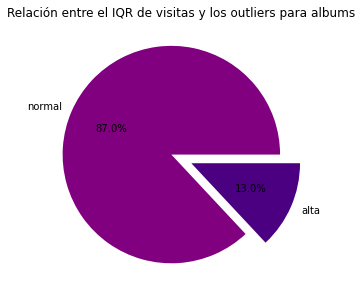

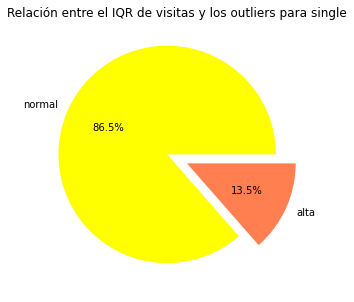

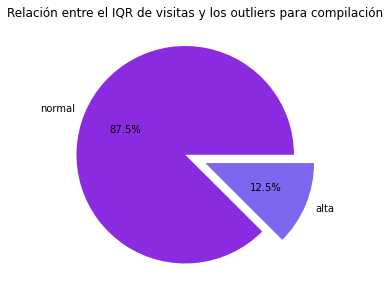

In [13]:
visitasportipo()